# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

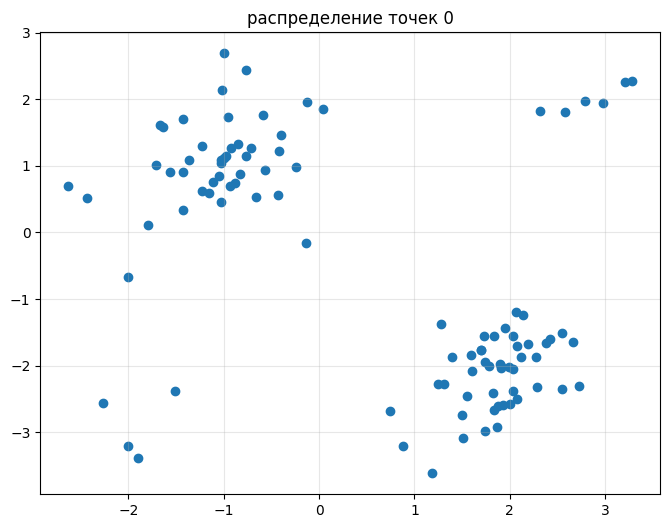

центр кластера 1: 1.90546599323694 -2.04085179372431
центр кластера 2: -0.994833442258678 1.11411202963946
усреднение умножить на 100000: 45531.6275489131 -46336.988204242494


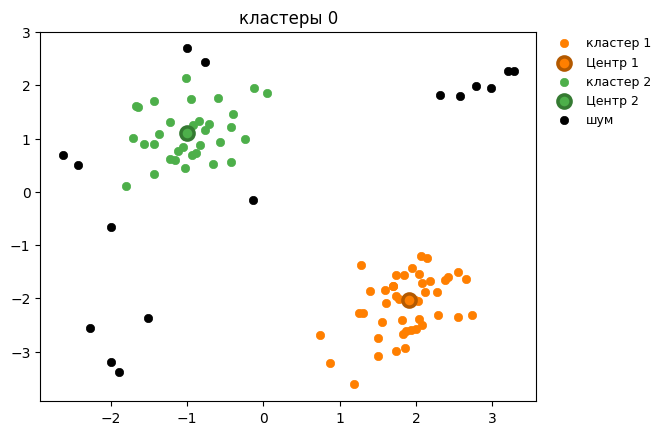

центр кластера 1: 1.90230290870091 -2.00777847689785
центр кластера 2: -1.03136426548801 1.0440245349879
усреднение умножить на 100000: 43546.932160645 -48187.697095497504


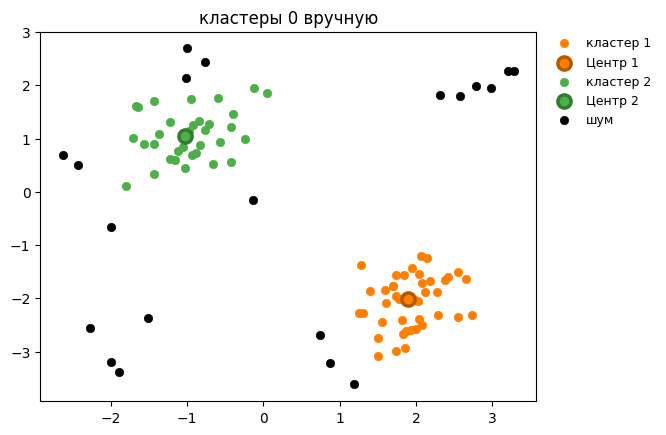

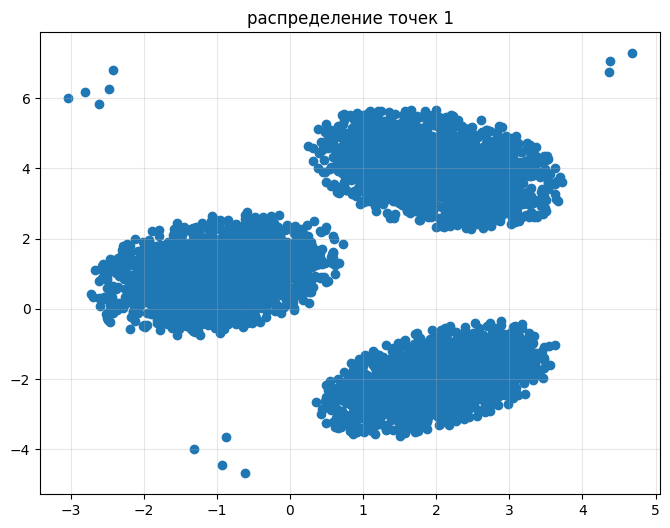

центр кластера 1: 1.99791135394103 -1.99916425848984
центр кластера 2: 0.179576783837604 2.1514083659381
усреднение умножить на 100000: 108874.40688893171 7612.205372412995


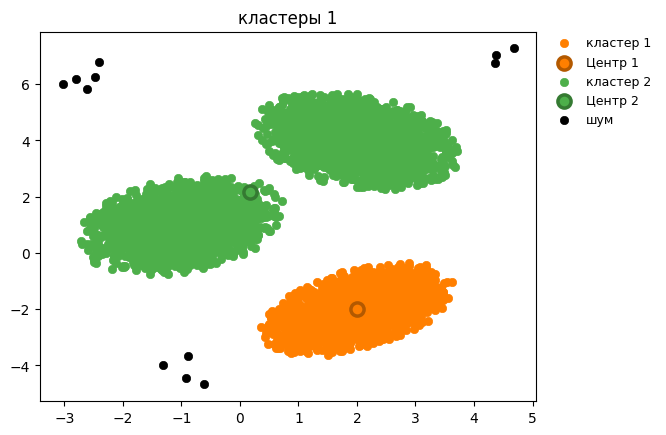

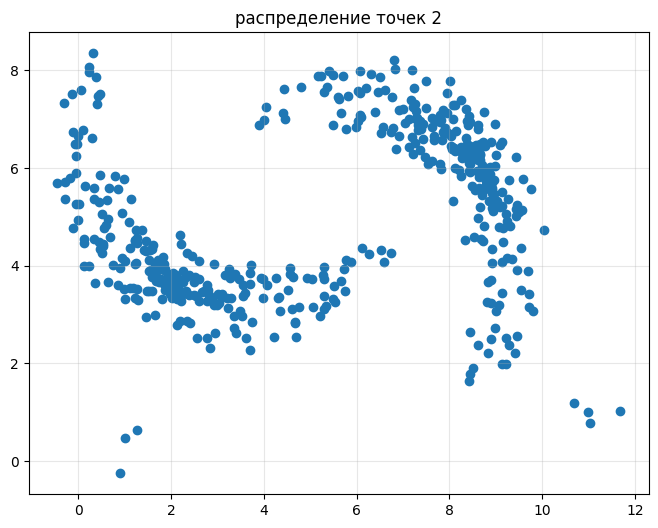

центр кластера 1: 8.226879675984339 6.3573821144228955
центр кластера 2: 2.090888540481165 3.663257265309101
усреднение умножить на 100000: 515888.4108232752 501031.9689865998


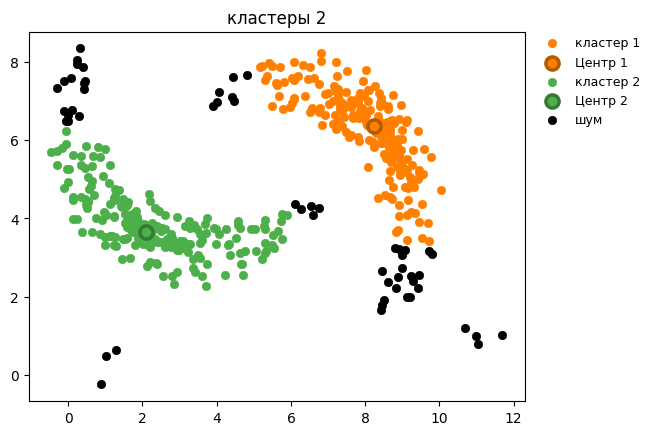

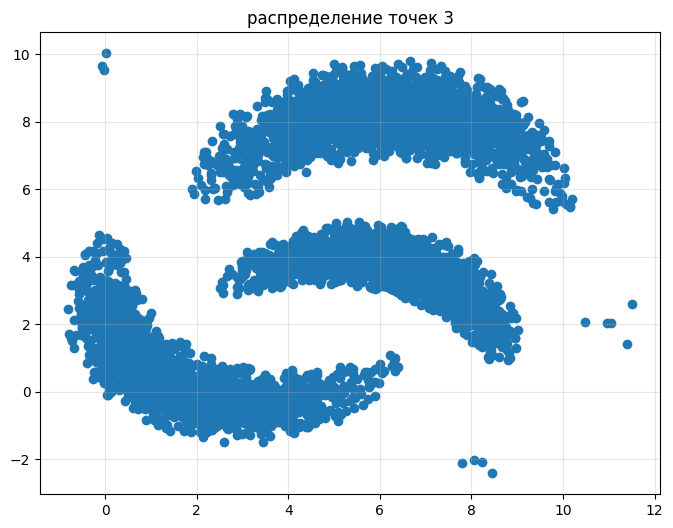

центр кластера 1: 6.0972760336772325 8.290449940374414
центр кластера 2: 1.696151015672141 0.12926250793867355
центр кластера 3: 6.338891180086092 3.8563329929926073
усреднение умножить на 100000: 471077.2743145156 409201.5147101898


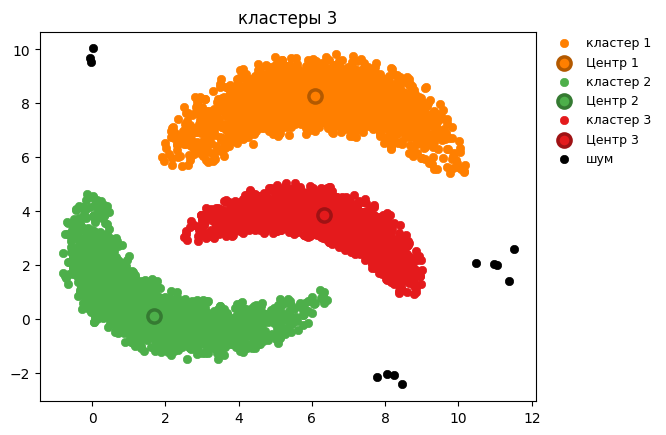

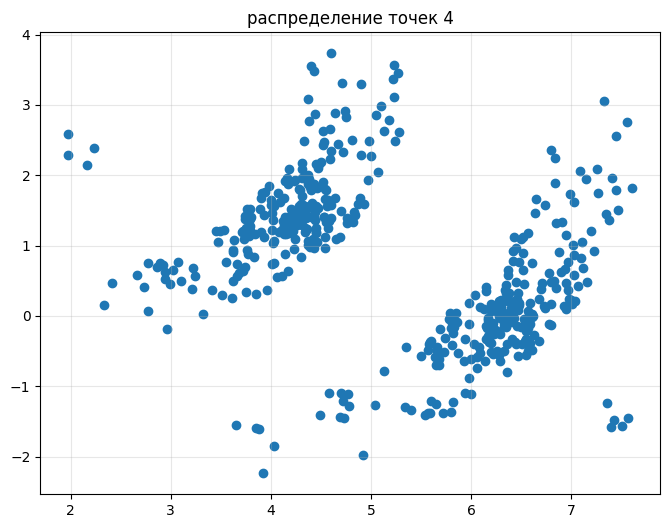

центр кластера 1: 4.244769949421723 1.4314581166536477
центр кластера 2: 6.345379497790253 -0.00618192181712196
усреднение умножить на 100000: 529507.4723605989 71263.80974182629


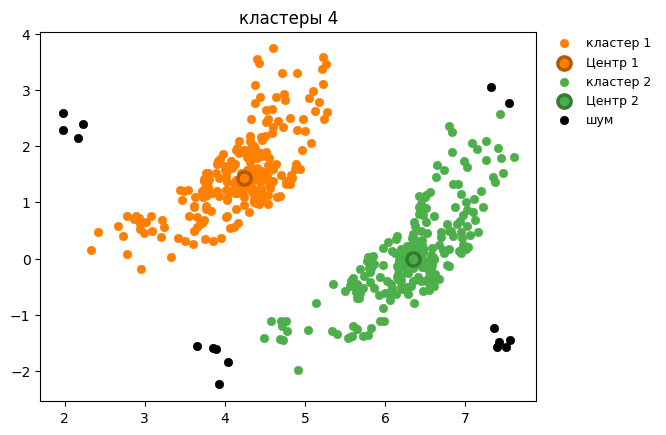

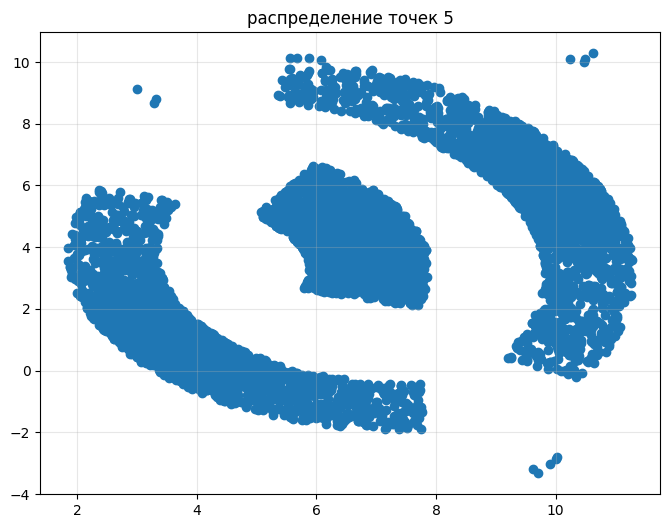

центр кластера 1: 6.632439176008907 4.29217649571196
центр кластера 2: 3.5836920133304764 0.9997837352964442
центр кластера 3: 9.882268280870775 5.82908406525797
усреднение умножить на 100000: 669946.6490070053 370701.4765422124


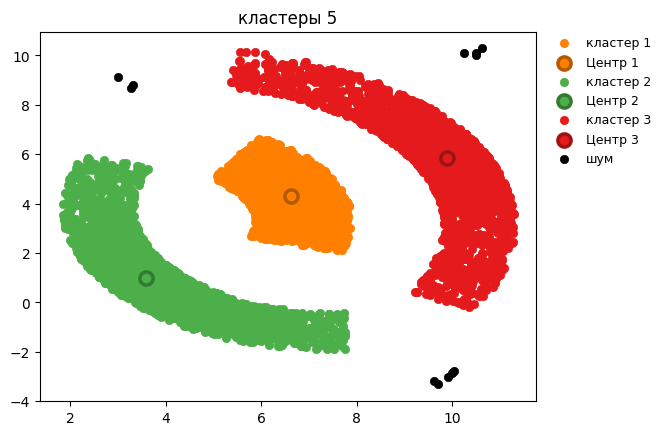

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

def find_center(points):
    dist_matrix = cdist(points, points, metric='euclidean')
    
    sum_distances = np.sum(dist_matrix, axis=1)
    
    center_idx = np.argmin(sum_distances)
    
    return points[center_idx], center_idx

def show_pts(pts, num):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[:,0], df[:,1])
    plt.title(f'распределение точек {num}')
    plt.grid(True, alpha=0.3)
    plt.show()

def show_clusters(pts, labels, num):
    clstr_clr = [
    '#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3',
    '#ffff33', '#a65628', '#f781bf', '#999999', '#8dd3c7',
    '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69',
    '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f',
    '#8da0cb'
    ]

    cntr_clr = [
    '#265880', '#b35900', '#357a32', '#9f1214', '#6a3672',
    '#b3b324', '#743c1c', '#ac5985', '#6b6b6b', '#63938a',
    '#8582a9', '#af5950', '#5a7d94', '#b17d44', '#7e9a4a',
    '#b090a0', '#979797', '#835a84', '#8fa58a', '#b3a64e',
    '#63708e'
    ]
    p = np.zeros(2)
    for i in range(1, int(max(labels)) + 1):
        clst = pts[labels == i]
        cntr = find_center(clst)
        plt.scatter(clst[:, 0], clst[:, 1], c=clstr_clr[i], linewidth=0.5, label=f'кластер {i}')
        plt.scatter(cntr[0][0], cntr[0][1],  c=clstr_clr[i], edgecolors=cntr_clr[i], linewidths=2.5,s=90, zorder=10, label=f'Центр {i}')
        print(f"центр кластера {i}: {cntr[0][0]} {cntr[0][1]}")
        p = p + cntr[0]
    print(f"усреднение умножить на 100000: {(p/max(labels))[0] * 100000} {(p/max(labels))[1] * 100000}")
    noise = pts[labels == -1]
    plt.scatter(noise[:, 0], noise[:, 1], c='#000000', linewidth=0.5, label=f'шум')
    plt.legend(
        loc='upper left', 
        bbox_to_anchor=(1.02, 1), 
        borderaxespad=0,  
        frameon=False,  
        fontsize=9,   
        ncol=1,   
        title_fontsize=10 
    )
    plt.title(f"кластеры {num}")
    plt.show()

def dbscan(pts, eps=1, min_samples=30):
    n = len(pts)
    labels = np.zeros(n, dtype=int)
    cr_id = 0
    
    dst = cdist(pts, pts, metric="euclidean")
    
    us = np.zeros(n, dtype=bool)
    
    for i in range(n):
        if us[i]:
            continue
            
        us[i] = True
        nbs = np.where(dst[i] < eps)[0]
        
        if len(nbs) < min_samples:
            labels[i] = -1
        else:
            cr_id += 1
            labels[i] = cr_id
            
            q = list(nbs)
            mask = np.zeros(n, dtype=bool)
            mask[nbs] = True
            
            j = 0
            while j < len(q):
                pt = q[j]
                
                if not us[pt]:
                    us[pt] = True
                    pt_nbs = np.where(dst[pt] < eps)[0]
                    
                    if len(pt_nbs) >= min_samples:
                        for nb in pt_nbs:
                            if not mask[nb]:
                                q.append(nb)
                                mask[nb] = True
                
                if labels[pt] == 0 or labels[pt] == -1:
                    labels[pt] = cr_id
                
                j += 1
    
    return labels

def f(pt):
    if pt[0] > 1 and pt[1] >-3.5 and pt[1] < -1:
        return 1
    if pt[0] > -2 and pt[0] < 0.1 and pt[1] > 0 and pt[1] < 2:
        return 2
    return -1

def hand_solution(pts):
    return np.array([f(i) for i in pts])

df = np.array(pd.read_excel('0.xls'))
show_pts(df, 0)
labels = dbscan(df)
labls1 = hand_solution(df)
show_clusters(df, labels, 0)
show_clusters(df, labls1, "0 вручную")

df = np.array(pd.read_excel('1.xls'))
show_pts(df, 1)
labels = dbscan(df)
show_clusters(df, labels, 1)

df = np.loadtxt('2.txt', skiprows=1, delimiter=',')
show_pts(df, 2)
labels = dbscan(df)
show_clusters(df, labels, 2)

df = np.loadtxt('3.txt', skiprows=1, delimiter=',')
show_pts(df, 3)
labels = dbscan(df)
show_clusters(df, labels, 3)

df = np.loadtxt('4.txt', delimiter=',')
show_pts(df, 4)
labels = dbscan(df)
show_clusters(df, labels, 4)

df = np.loadtxt('5.txt', delimiter=',')
show_pts(df, 5)
labels = dbscan(df)
show_clusters(df, labels, 5)


# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [39]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


from sklearn.cluster import MeanShift, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.mixture import GaussianMixture

c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


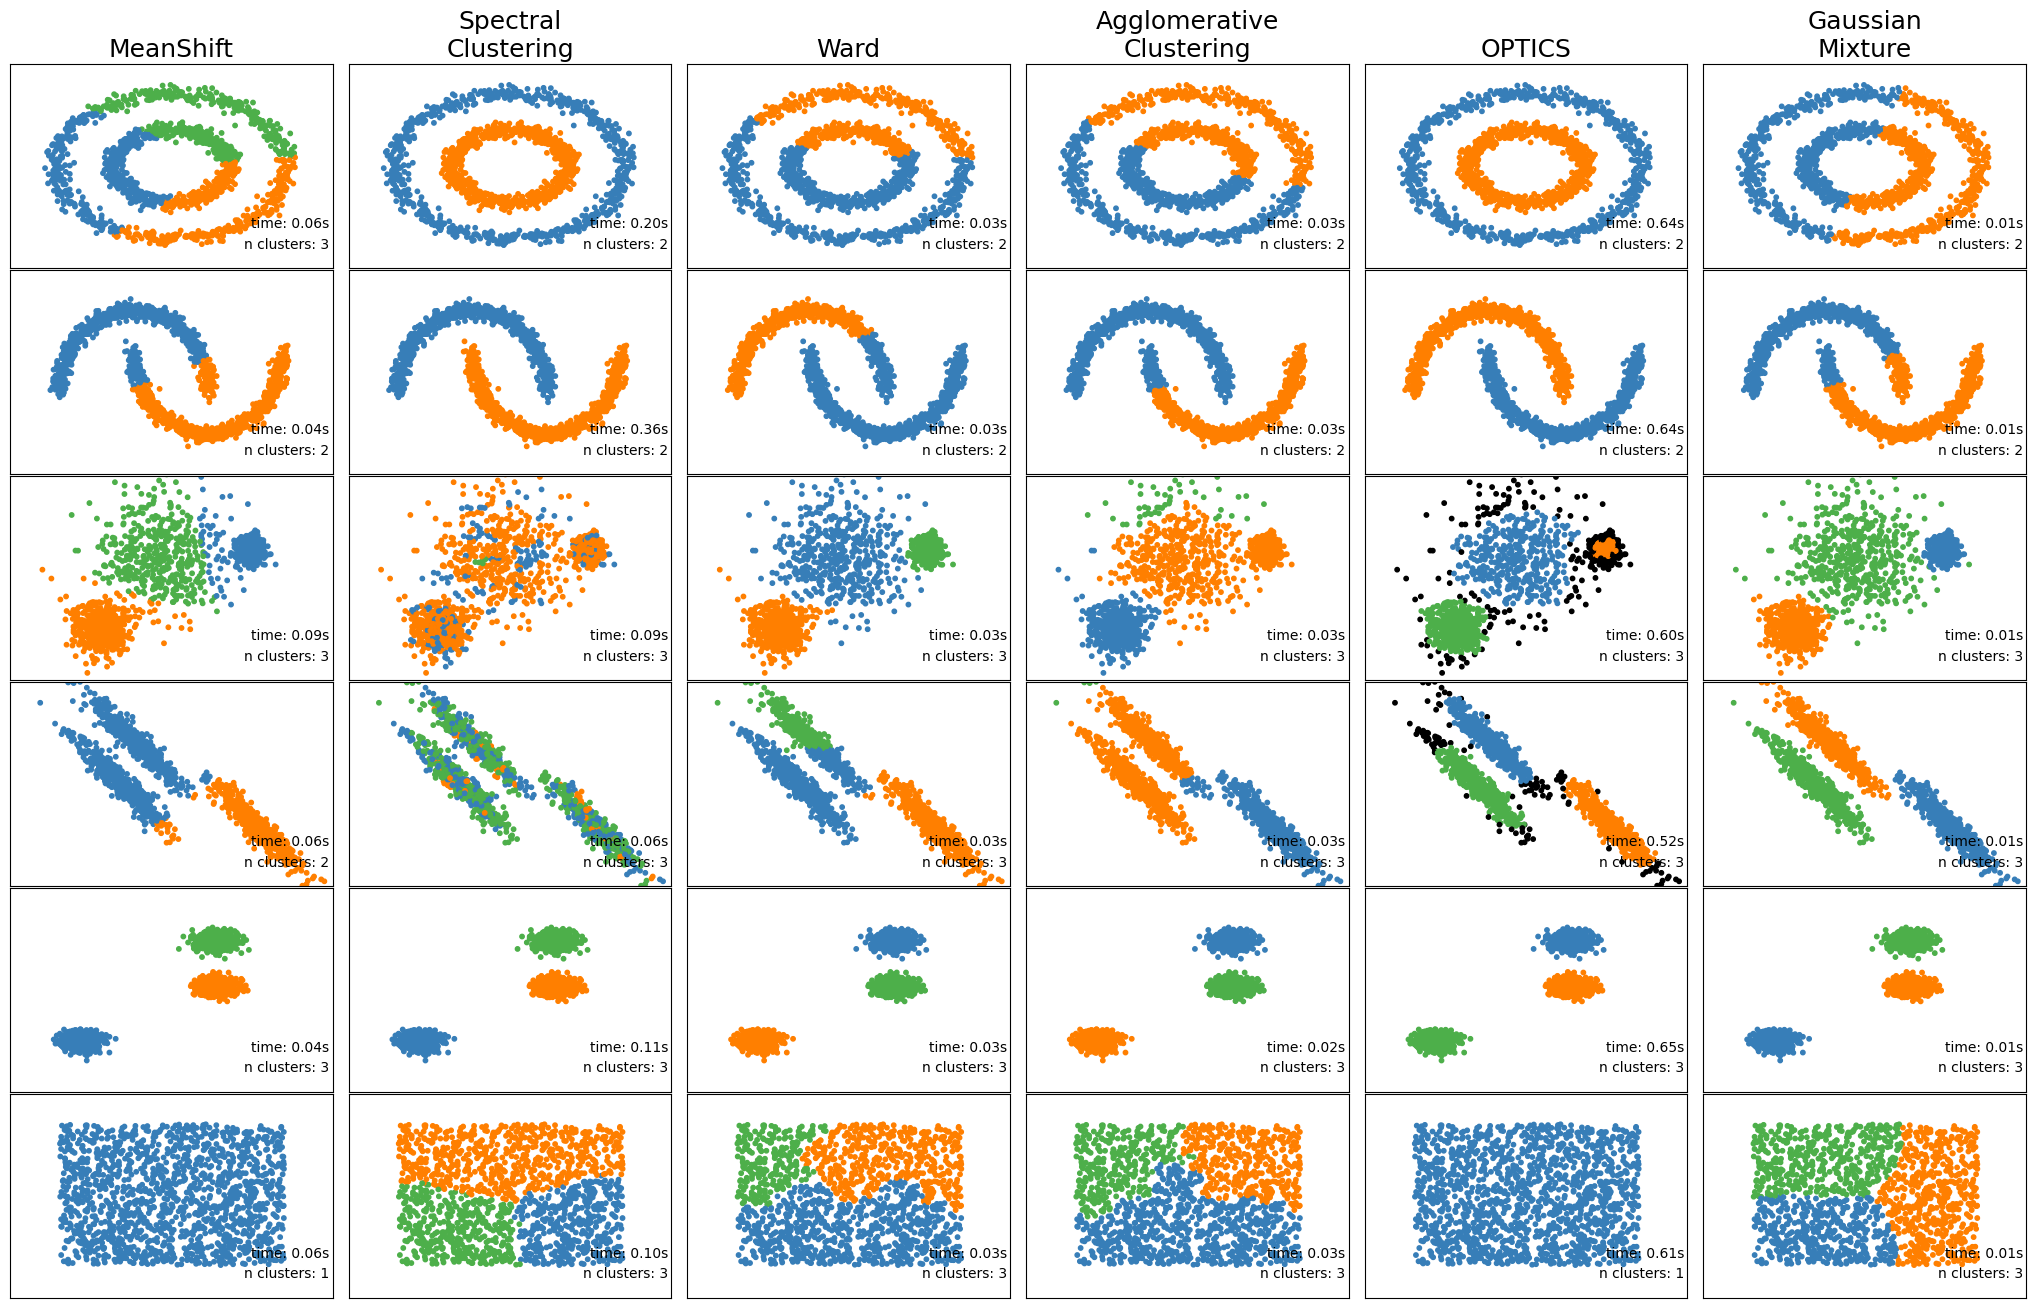

In [40]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    ms = MeanShift(
    bandwidth=bandwidth,
    bin_seeding=True
    )

    spectral = SpectralClustering(
        n_clusters=params["n_clusters"],
        affinity='nearest_neighbors',
        n_neighbors=params["n_neighbors"],
    )

    ward = AgglomerativeClustering(
        n_clusters=params["n_clusters"],
        linkage='ward'
    )

    average_linkage = AgglomerativeClustering(
        n_clusters=params["n_clusters"],
        linkage='average'
    )

    optics = OPTICS(
        min_samples=params["min_samples"],
        max_eps=params["eps"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )

    gmm = GaussianMixture(
        n_components=params["n_clusters"],
        random_state=0,
    )

    clustering_algorithms = (
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("OPTICS", optics),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        
        colors = [
        '#377eb8', '#ff7f00', '#4daf4a', '#e41a1c', '#984ea3',
        '#ffff33', '#a65628', '#f781bf', '#999999', '#8dd3c7',
        '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69',
        '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f',
        '#8da0cb'
        ]
        
        # черный - шум
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        
        plt.text(0.99, 0.2, f'time: {(t1-t0):.2f}s',
                transform=plt.gca().transAxes,
                horizontalalignment='right')
        plt.text(0.99, 0.1, f'n clusters: {max(y_pred + 1)}',
                transform=plt.gca().transAxes,
                horizontalalignment='right')
        if i_dataset == 0:
            plt.title(name, size=18)
        
        plot_num += 1

plt.show()